# 1. Pytorch加载数据

① Pytorch中加载数据需要Dataset、Dataloader。

 - Dataset提供一种方式去获取每个数据及其对应的label，告诉我们总共有多少个数据。
 - Dataloader为后面的网络提供不同的数据形式，它将一批一批数据进行一个打包。

# 2. 常用数据集两种形式

① 常用的第一种数据形式，文件夹的名称是它的label。

② 常用的第二种形式，lebel为文本格式，文本名称为图片名称，文本中的内容为对应的label。

In [12]:
from torch.utils.data import Dataset
help(Dataset)

Help on class Dataset in module torch.utils.data.dataset:

class Dataset(typing.Generic)
 |  An abstract class representing a :class:`Dataset`.
 |  
 |  All datasets that represent a map from keys to data samples should subclass
 |  it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
 |  data sample for a given key. Subclasses could also optionally overwrite
 |  :meth:`__len__`, which is expected to return the size of the dataset by many
 |  :class:`~torch.utils.data.Sampler` implementations and the default options
 |  of :class:`~torch.utils.data.DataLoader`. Subclasses could also
 |  optionally implement :meth:`__getitems__`, for speedup batched samples
 |  loading. This method accepts list of indices of samples of batch and returns
 |  list of samples.
 |  
 |  .. note::
 |    :class:`~torch.utils.data.DataLoader` by default constructs an index
 |    sampler that yields integral indices.  To make it work with a map-style
 |    dataset with non-integral ind

# 3. 路径直接加载数据

In [13]:
from PIL import Image

img_path = 'D:\\深度学习\\Pytorch的使用\\100_土堆数据集\\Data\\FirstTypeData\\train\\ants\\0013035.jpg'       
img = Image.open(img_path)
img.show()

1. 特性:IPython.display.Image,
   - 主要用途,仅仅用于展示 (就像相框)
   - 数据源,文件路径、URL 链接、二进制流,
   - 能否修改像素,❌ 不能,
   - 能否转 Numpy/Tensor,❌ 不能
   - PyTorch 兼容性,无关

2. PIL.Image
   - 图像处理与读取 (就像 Photoshop)
   - 文件路径、文件流 (不支持直接 URL)
   - 能否修改像素:✅ 能 (裁剪、旋转、调色)
   - 能否转 Numpy/Tensor:✅ 能 (这是深度学习必须的)
   - PyTorch 兼容性,:核心依赖 (torchvision 默认用它)

# 4. Dataset加载数据

124
121
245
label: bees


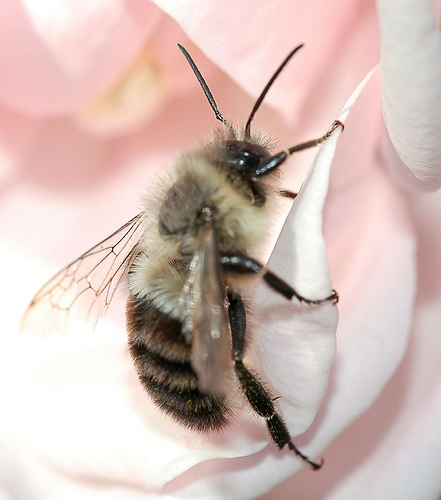

In [14]:
# 1. 导入必要的库
from torch.utils.data import Dataset  # 导入 Dataset 父类，所有的自定义数据集都要继承它
from PIL import Image                 # 导入 PIL 库，专门用来读取和处理图片的
import os                             # 导入 os 库，用来和操作系统打交道（比如处理文件路径、读取文件名）
from torch.utils.data import ConcatDataset

# 2. 定义自己的数据集类，继承自 Dataset
class MyData(Dataset):
    # --- 初始化函数：当我们在外面写 MyData(...) 时，自动运行这个函数 ---
    def __init__(self, root_dir, label_dir):
        self.root_dir = root_dir      # 把传进来的根目录路径存成“全局变量”，方便别的函数用
        self.label_dir = label_dir    # 把传进来的标签目录（比如 "ants"）存起来
        
        # os.path.join 是个神器，它能自动拼接路径。
        # 这里把 "D:\\...\\train" 和 "ants" 拼在一起，变成完整的文件夹路径
        self.path = os.path.join(self.root_dir, self.label_dir) 
        
        # os.listdir 会去这个文件夹里看一眼，把里面所有图片的名字（如 "001.jpg"）变成一个列表存起来
        self.img_path = os.listdir(self.path) 

    # --- 获取项目函数：当你写 dataset[idx] 时，自动运行这个函数 ---
    def __getitem__(self, idx):
        # idx 是编号（比如 0, 1, 2...）。这里是根据编号拿到具体的图片文件名
        img_name = self.img_path[idx]  
        
        # 再次拼接路径：把文件夹路径和图片文件名拼在一起，得到这张图片的绝对路径
        # 例如：D:\\...\\ants\\0013035.jpg
        img_item_path = os.path.join(self.root_dir, self.label_dir, img_name)
        
        # 使用 PIL 库打开这张图片
        img = Image.open(img_item_path)
        
        # 获取这张图片的标签（在这里，文件夹名字 "ants" 就是标签）
        label = self.label_dir
        
        # 返回 图片本身 和 它的标签。这就是我们要喂给神经网络的数据
        return img, label

    # --- 获取长度函数：当你写 len(dataset) 时，自动运行这个函数 ---
    def __len__(self):
        # 返回这个列表里一共有多少张图片
        return len(self.img_path)
    def __look__(self):
        print(self.img_path)

# --- 下面是主程序部分 ---

# 定义数据的根目录（注意：Windows下路径要用双斜杠 \\ 防止转义，或者用单反斜杠 /）
root_dir = "D:\\深度学习\\Pytorch的使用\\100_土堆数据集\\Data\\FirstTypeData\\train"
ants_label_dir = "ants"  # 定义蚂蚁数据的文件夹名
bees_label_dir = "bees"  # 定义蜜蜂数据的文件夹名

# 实例化 MyData 类，创建蚂蚁数据集对象
ants_dataset = MyData(root_dir, ants_label_dir)
# 实例化 MyData 类，创建蜜蜂数据集对象
bees_dataset = MyData(root_dir, bees_label_dir)

# 打印看一下蚂蚁数据集里有多少张图
print( ants_dataset.__len__() )
# 打印看一下蜜蜂数据集里有多少张图
print( bees_dataset.__len__() ) 

# 【注意】这里是把两个数据集拼起来（类似于列表相加），变成一个大的训练集
train_dataset = ConcatDataset([ants_dataset, bees_dataset])
print(train_dataset.__len__()) # 打印总数

# 从大集合里拿出第 201 张（索引是200）数据
img, label = train_dataset.__getitem__(200)

# 打印这张图片的标签
print("label:", label)

# 展示这张图片（会调用系统默认的图片查看器弹出来）
img